# IMDB (Internet Movie Database)

## [Keras Dataset](https://keras.io/datasets/)

IMDB Movie reviews sentiment classification

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [58]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras import optimizers
from fnn_helper import PlotLosses
from keras.callbacks import ModelCheckpoint 
%matplotlib inline

np.random.seed(42)

In [59]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [60]:
print('Review:')
print(x_train[0])
print()
print('Sentimiento:')
print(y_train[0])

Review:
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]

Sentimiento:
1


In [61]:
# Turning the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train.shape)
print(x_test.shape)

(25000, 1000)
(25000, 1000)


In [62]:
x_train[0]

array([ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0

In [63]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


Modelo I: modelo simple de 1 Capa

In [72]:
#Armo el modelo
def one_layer_model_i (lr=0.01, decay=0):
    model = Sequential()
    
    model.add(Dense(num_classes, input_dim=(1000), activation='softmax', kernel_initializer='zeros', name='Output'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'binary_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model
model_one_layer = one_layer_model_i ()
model_one_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Output (Dense)               (None, 2)                 2002      
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Callbacks
## Callback para graficar
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=20, x_val=x_test, y_val_categorical=y_test)
## Callback para guardar pesos
checkpointer = ModelCheckpoint(filepath='C:\DBi\Data_Science\Laboratorio de Machine Learning\imdb.hdf5', verbose=1, save_best_only=True)

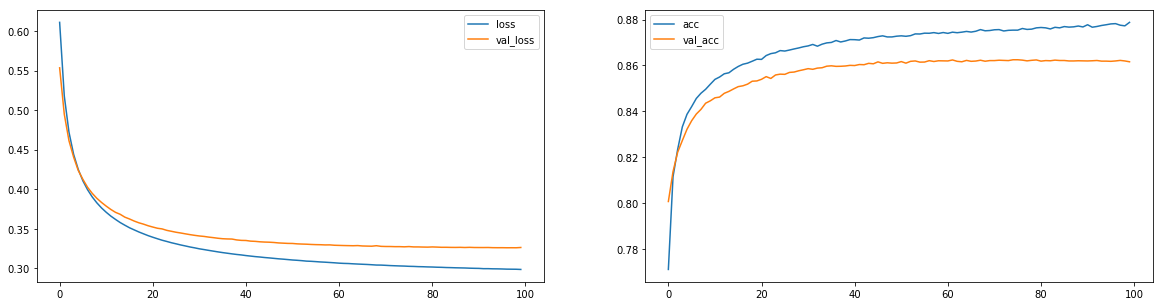

Epoch 00100: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 0.2987 - acc: 0.8788 - val_loss: 0.3264 - val_acc: 0.8616


In [74]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_one_layer.fit(x_train, y_train,
          batch_size=100,
          epochs=100,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],
        )

In [75]:
# Evaluar el modelo
score = model_one_layer.evaluate(x_test, y_test, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.326409232178
accuracy:  0.8616


Modelo II: Agrego una capa con 100 neuronas

In [69]:
def two_layer_model_ii(lr=0.01, decay=0.0):
    model = Sequential()
    model.add(Dense(100, input_dim=(1000), activation='sigmoid', kernel_initializer='normal', name='Middle'))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer='normal', name='Output'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'binary_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model
model_two_layers_ii = two_layer_model_ii ()
model_two_layers_ii.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Middle (Dense)               (None, 100)               100100    
_________________________________________________________________
Output (Dense)               (None, 2)                 202       
Total params: 100,302
Trainable params: 100,302
Non-trainable params: 0
_________________________________________________________________


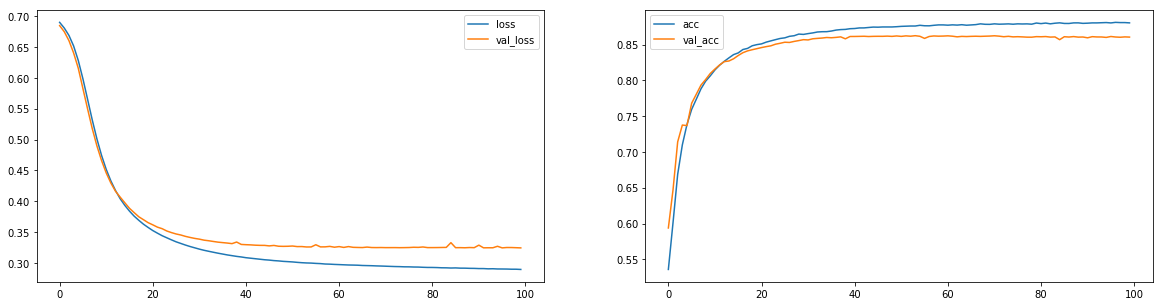

Epoch 00100: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 0.2893 - acc: 0.8804 - val_loss: 0.3242 - val_acc: 0.8605


In [70]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_two_layers.fit(x_train, y_train,
          batch_size=64,
          epochs=100,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],                     
        )

In [71]:
# Evaluar el modelo
score = model_two_layers_ii.evaluate(x_test, y_test, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.324229765711
accuracy:  0.86052


Modelo III: le sumo neuronas a la capa oculta, pasando de 100 a 2000 (cambio brusco para probar el efecto sobre la accuracy)

In [77]:
def two_layer_model_iii(lr=0.01, decay=0.0):
    model = Sequential()
    model.add(Dense(2000, input_dim=(1000), activation='sigmoid', kernel_initializer='normal', name='Middle'))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer='normal', name='Output'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'binary_crossentropy', optimizer=SGD, metrics=['accuracy'])
    return model
model_two_layers_iii = two_layer_model_iii()
model_two_layers_iii.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Middle (Dense)               (None, 2000)              2002000   
_________________________________________________________________
Output (Dense)               (None, 2)                 4002      
Total params: 2,006,002
Trainable params: 2,006,002
Non-trainable params: 0
_________________________________________________________________


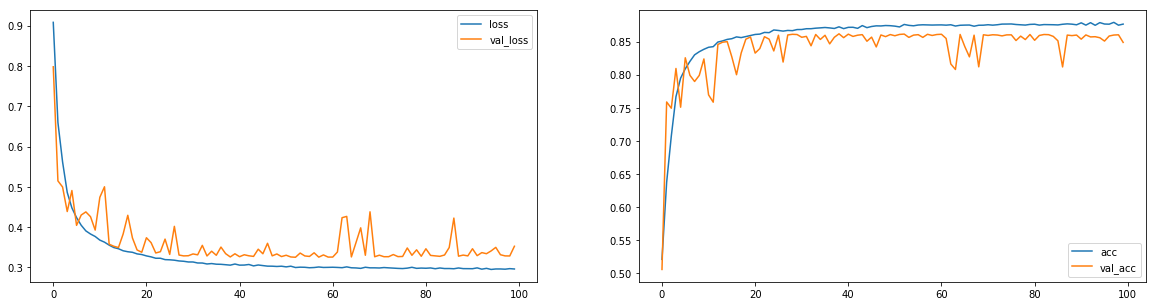

Epoch 00100: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 0.2961 - acc: 0.8765 - val_loss: 0.3524 - val_acc: 0.8488


In [78]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_two_layers_iii.fit(x_train, y_train,
          batch_size=64,
          epochs=100,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],                     
        )

Modelo IV: Mantengo las 2000 neuronas, pero pruebo con otro optimizador (rmsprop)

In [80]:
def two_layer_model_iv(lr=0.01, decay=0.0):
    model = Sequential()
    model.add(Dense(2000, input_dim=(1000), activation='sigmoid', kernel_initializer='normal', name='Middle'))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer='normal', name='Output'))
    
    SGD = optimizers.SGD(lr=lr)
    model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model_two_layers_iv = two_layer_model_iv()
model_two_layers_iv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Middle (Dense)               (None, 2000)              2002000   
_________________________________________________________________
Output (Dense)               (None, 2)                 4002      
Total params: 2,006,002
Trainable params: 2,006,002
Non-trainable params: 0
_________________________________________________________________


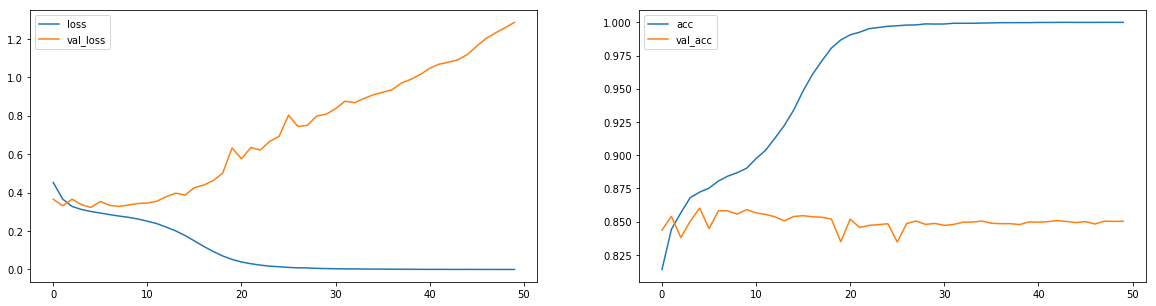

Epoch 00050: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 4.6208e-07 - acc: 1.0000 - val_loss: 1.2865 - val_acc: 0.8503


In [82]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_two_layers_iv.fit(x_train, y_train,
          batch_size=64,
          epochs=50,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],                     
        )

Hago un último intento por mejorar la precisión del modelo I, viendo si puedo reducir el sobreajuste del modelo IV con 2 técnicas diferentes

Modelo V: a la versión IV le aplico un L2

In [84]:
from keras import regularizers

In [85]:
def two_layer_model_v (lr=0.01, l2_lambda=0.1, decay=0.0):
    model = Sequential()
    regularizer = regularizers.l2(l2_lambda)
    SGD = optimizers.SGD(lr=lr)
    
    model.add(Dense(2000, input_dim=(1000), activation='sigmoid', kernel_initializer='normal', name='Middle'))
    model.add(Dense(num_classes, 
                    activation='softmax', 
                    kernel_initializer='normal', 
                    name='Output',
                    kernel_regularizer=regularizer, 
                    bias_regularizer=regularizer))

    model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model_two_layers_v = two_layer_model_v()
model_two_layers_v.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Middle (Dense)               (None, 2000)              2002000   
_________________________________________________________________
Output (Dense)               (None, 2)                 4002      
Total params: 2,006,002
Trainable params: 2,006,002
Non-trainable params: 0
_________________________________________________________________


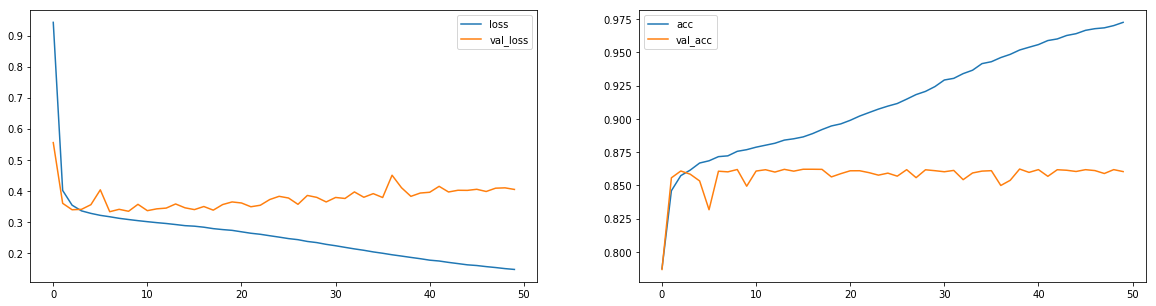

Epoch 00050: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 0.1467 - acc: 0.9726 - val_loss: 0.4046 - val_acc: 0.8604


In [86]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_two_layers_v.fit(x_train, y_train,
          batch_size=64,
          epochs=50,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],                     
        )

Modelo VI: a la versión IV le aplico Dropout

In [99]:
def two_layer_model_vi (lr=0.01, prob=0.1, decay=0.0):
    model = Sequential()
   
    SGD = optimizers.SGD(lr=lr)
    
    model.add(Dense(2000, input_dim=(1000), activation='sigmoid', kernel_initializer='normal', name='Middle'))
    model.add(Dropout(prob))
    model.add(Dense(num_classes, 
                    activation='softmax', 
                    kernel_initializer='normal', 
                    name='Output',
                    ))

    model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model_two_layers_vi = two_layer_model_vi()
model_two_layers_vi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Middle (Dense)               (None, 2000)              2002000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2000)              0         
_________________________________________________________________
Output (Dense)               (None, 2)                 4002      
Total params: 2,006,002
Trainable params: 2,006,002
Non-trainable params: 0
_________________________________________________________________


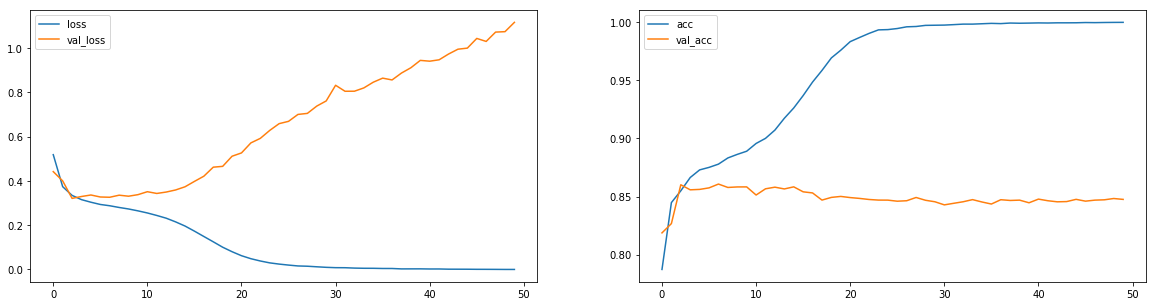

Epoch 00050: val_loss did not improve

25000/25000 [==============================] - ETA: 0s - loss: 1.1048e-04 - acc: 1.0000 - val_loss: 1.1161 - val_acc: 0.8475


In [100]:
# Entrenar el modelo callbacks=[plot_losses]
# Modifique batch_size y epochs si lo desea
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

hist = model_two_layers_vi.fit(x_train, y_train,
          batch_size=64,
          epochs=50,
          validation_data=(x_test, y_test), 
          callbacks=[plot_losses, checkpointer],                     
        )

Conclusión: el modelo I, que es el más modelo más simple que apliqué, fue el que tuvo los mejores % de precisión, aunque el modelo II, con una capa oculta de 200 neuronas, también funcionó de manera correcta aunque no logró superarlo en términos de precisión. El hecho de aumentar la cantidad de neuronas en la capa oculta sólo trajo un poco más de "ruido" (modelo III) y al intentar mejorarlo con otro optimizador, lo que que logré fue sobreajustar el modelo de modo extremos (modelo IV). Intenté menguar el sobreajuste con un L2, con un leve éxito (modelo V) pero volvió a empeorar cuando lo hice a través de un Dropout (modelo VI)